In [4]:
# Data Wrangling II operations using Python..(e.g.,
# Academic_Performance.csv)
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using median and 0).Apply for single column and whole dataset.
# 2. Scan all numeric variables for outliers. If there are outliers,any of the suitable techniques to deal with them.(using IQR)
# 3.Display and Remove the outliers show q1 and q3
# 4. Apply aggregation function (max,avg). The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.
# 5. Draw Scatter plot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the dataset
df =pd.read_csv((r"C:\CODE\ds\DS\DS\PR_EXAM_DATASET\AcademicPerformance_New.csv"))

# Preview the data
df.head()


,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [ ]:
# Drop rows that are completely empty
df.dropna(how='all', inplace=True)

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna("0", inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Check if any missing values remain
df.isnull().sum()


In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create dictionary to store IQR bounds
iqr_bounds = {}

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_bounds[col] = (Q1, Q3, lower_bound, upper_bound)

# Display outliers
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_cols)

for col in numeric_cols:
    Q1, Q3, lower, upper = iqr_bounds[col]
    outlier_mask[col] = (df[col] < lower) | (df[col] > upper)

outliers = df[outlier_mask.any(axis=1)]
print("Outliers Detected:")
outliers


Outliers Detected:


,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
17,18.0,Rassia,18.0,32.0,28.0,26.000000,D,Yes
59,60.0,Rassia,70.0,50.0,20.0,46.666667,D,Yes
76,77.0,USA,30.0,26.0,22.0,26.000000,D,Yes


In [14]:
# Remove rows with any outlier
df_no_outliers = df[~outlier_mask.any(axis=1)]

# Show bounds used
for col in numeric_cols:
    Q1, Q3, lower, upper = iqr_bounds[col]
    print(f"{col} - Q1: {Q1}, Q3: {Q3}, Lower Bound: {lower}, Upper Bound: {upper}")

print("Shape after removing outliers:", df_no_outliers.shape)


Roll No - Q1: 26.25, Q3: 74.75, Lower Bound: -46.5, Upper Bound: 147.5
WT - Q1: 53.0, Q3: 71.0, Lower Bound: 26.0, Upper Bound: 98.0
DSBDA - Q1: 55.0, Q3: 74.0, Lower Bound: 26.5, Upper Bound: 102.5
AI - Q1: 54.0, Q3: 74.0, Lower Bound: 24.0, Upper Bound: 104.0
Average - Q1: 45.25, Q3: 71.916666666675, Lower Bound: 5.2499999999875016, Upper Bound: 111.91666666668749
Shape after removing outliers: (95, 8)


In [15]:
# Reason: Reducing skewness and normalizing data distribution
# We apply average scaling and max normalization

# Copy dataframe
df_transformed = df_no_outliers.copy()

# Create new scaled columns
for col in numeric_cols:
    df_transformed[f"{col}_avg_scaled"] = df_transformed[col] / df_transformed[col].mean()
    df_transformed[f"{col}_max_scaled"] = df_transformed[col] / df_transformed[col].max()

# Show transformed columns
df_transformed[[col for col in df_transformed.columns if 'scaled' in col]].head()


,Roll No_avg_scaled,Roll No_max_scaled,WT_avg_scaled,WT_max_scaled,DSBDA_avg_scaled,DSBDA_max_scaled,AI_avg_scaled,AI_max_scaled,Average_avg_scaled,Average_max_scaled
0,0.019825,0.010101,1.161488,0.742268,1.097561,0.757895,1.164679,0.804348,1.221757,0.792727
1,0.039649,0.020202,1.113092,0.711340,1.371951,0.947368,0.991551,0.684783,0.891098,0.578182
3,0.079299,0.040404,0.758193,0.484536,1.006098,0.694737,0.692512,0.478261,0.509999,0.330909
4,0.099124,0.050505,1.226015,0.783505,1.189024,0.821053,0.991551,0.684783,0.863076,0.560000
5,0.118948,0.060606,1.145356,0.731959,1.265244,0.873684,1.227634,0.847826,1.300218,0.843636


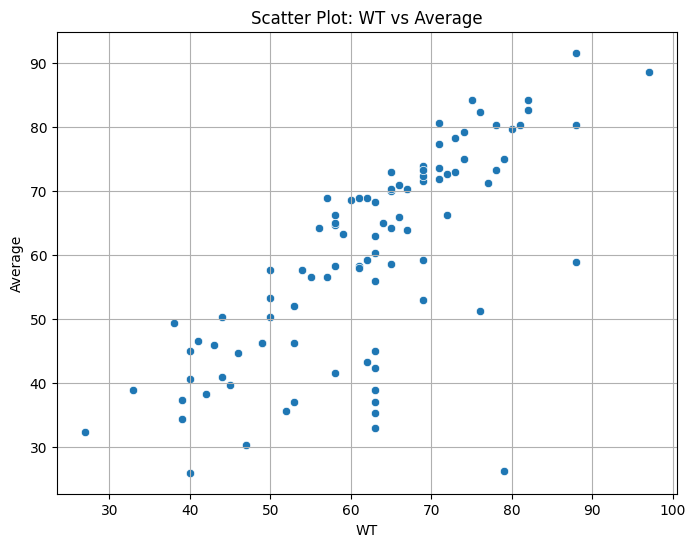

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_transformed, x='WT', y='Average')
plt.title('Scatter Plot: WT vs Average')
plt.xlabel('WT')
plt.ylabel('Average')
plt.grid()
plt.show()
